# About the dataset
The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. 

The data are stored in the CardioGoodFitness.csv file. The team identifies the following customer variables to study: 
- product purchased: TM195, TM498, or TM798; 
- gender; 
- age, in years;
- education, in years;
- relationship status, single or partnered;
- annual household income ($);
- average number of times the customer plans to use the treadmill each week;
- average number of miles the customer expects to walk/run each week;
- and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

## Task / Goal
Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

In [26]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv('CardioGoodFitness.csv')
df.head(20)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


First, let's see if there are missing values

In [27]:
df[df.isna() == True].value_counts()

Series([], dtype: int64)

Our dataset has no missing values. That is good for the project, bad for my learning.^^

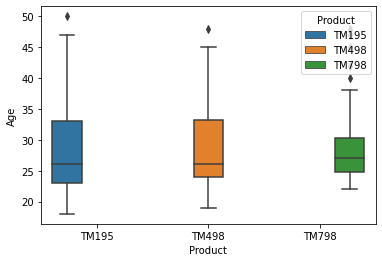

In [28]:
plt.figure()
ax = sb.boxplot(x='Product',y='Age',data=df, hue='Product')
sb.move_legend(ax, loc='upper right')

The plot above may indicate that the Age range is higher for the TM195 product. We should explore this also with respect to fitness

<AxesSubplot:xlabel='Product', ylabel='Age'>

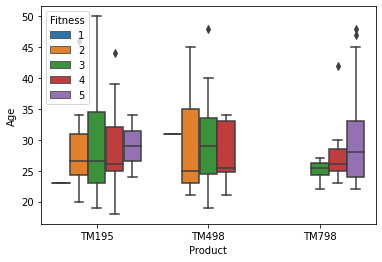

In [29]:
sb.boxplot(x='Product',y='Age',data=df, hue='Fitness')

In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Here we can see that we have some outliers with respect to Age. Also, we can see that the Age for the most frequent buyer is around 25-28 for every product.
- 50% of the buyers are under 26 years old

<AxesSubplot:xlabel='Product', ylabel='Income'>

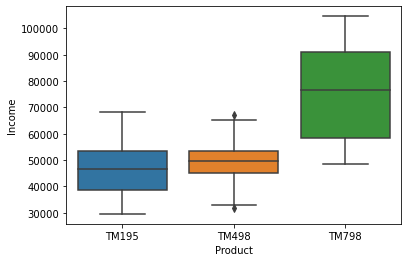

In [6]:
sb.boxplot(x='Product',y='Income',data=df)

Now here we can see that the buyers of the product TM798 have considerably higher income. It may suggest that this product is more expensive

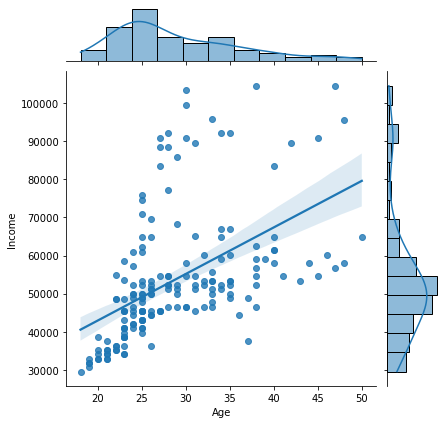

In [7]:
#Curious thing to see
sb.jointplot(x='Age',y='Income',data=df, kind='reg')

In the plot above we can see a nice example of a Left Skewed Distribution(Age) and a Right Skewed Distribution(Income) that have a positive correlation.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

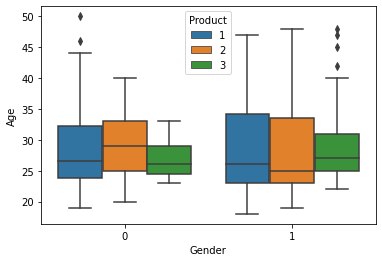

In [22]:
sb.boxplot(x='Gender',y='Age',data=df, hue='Product')

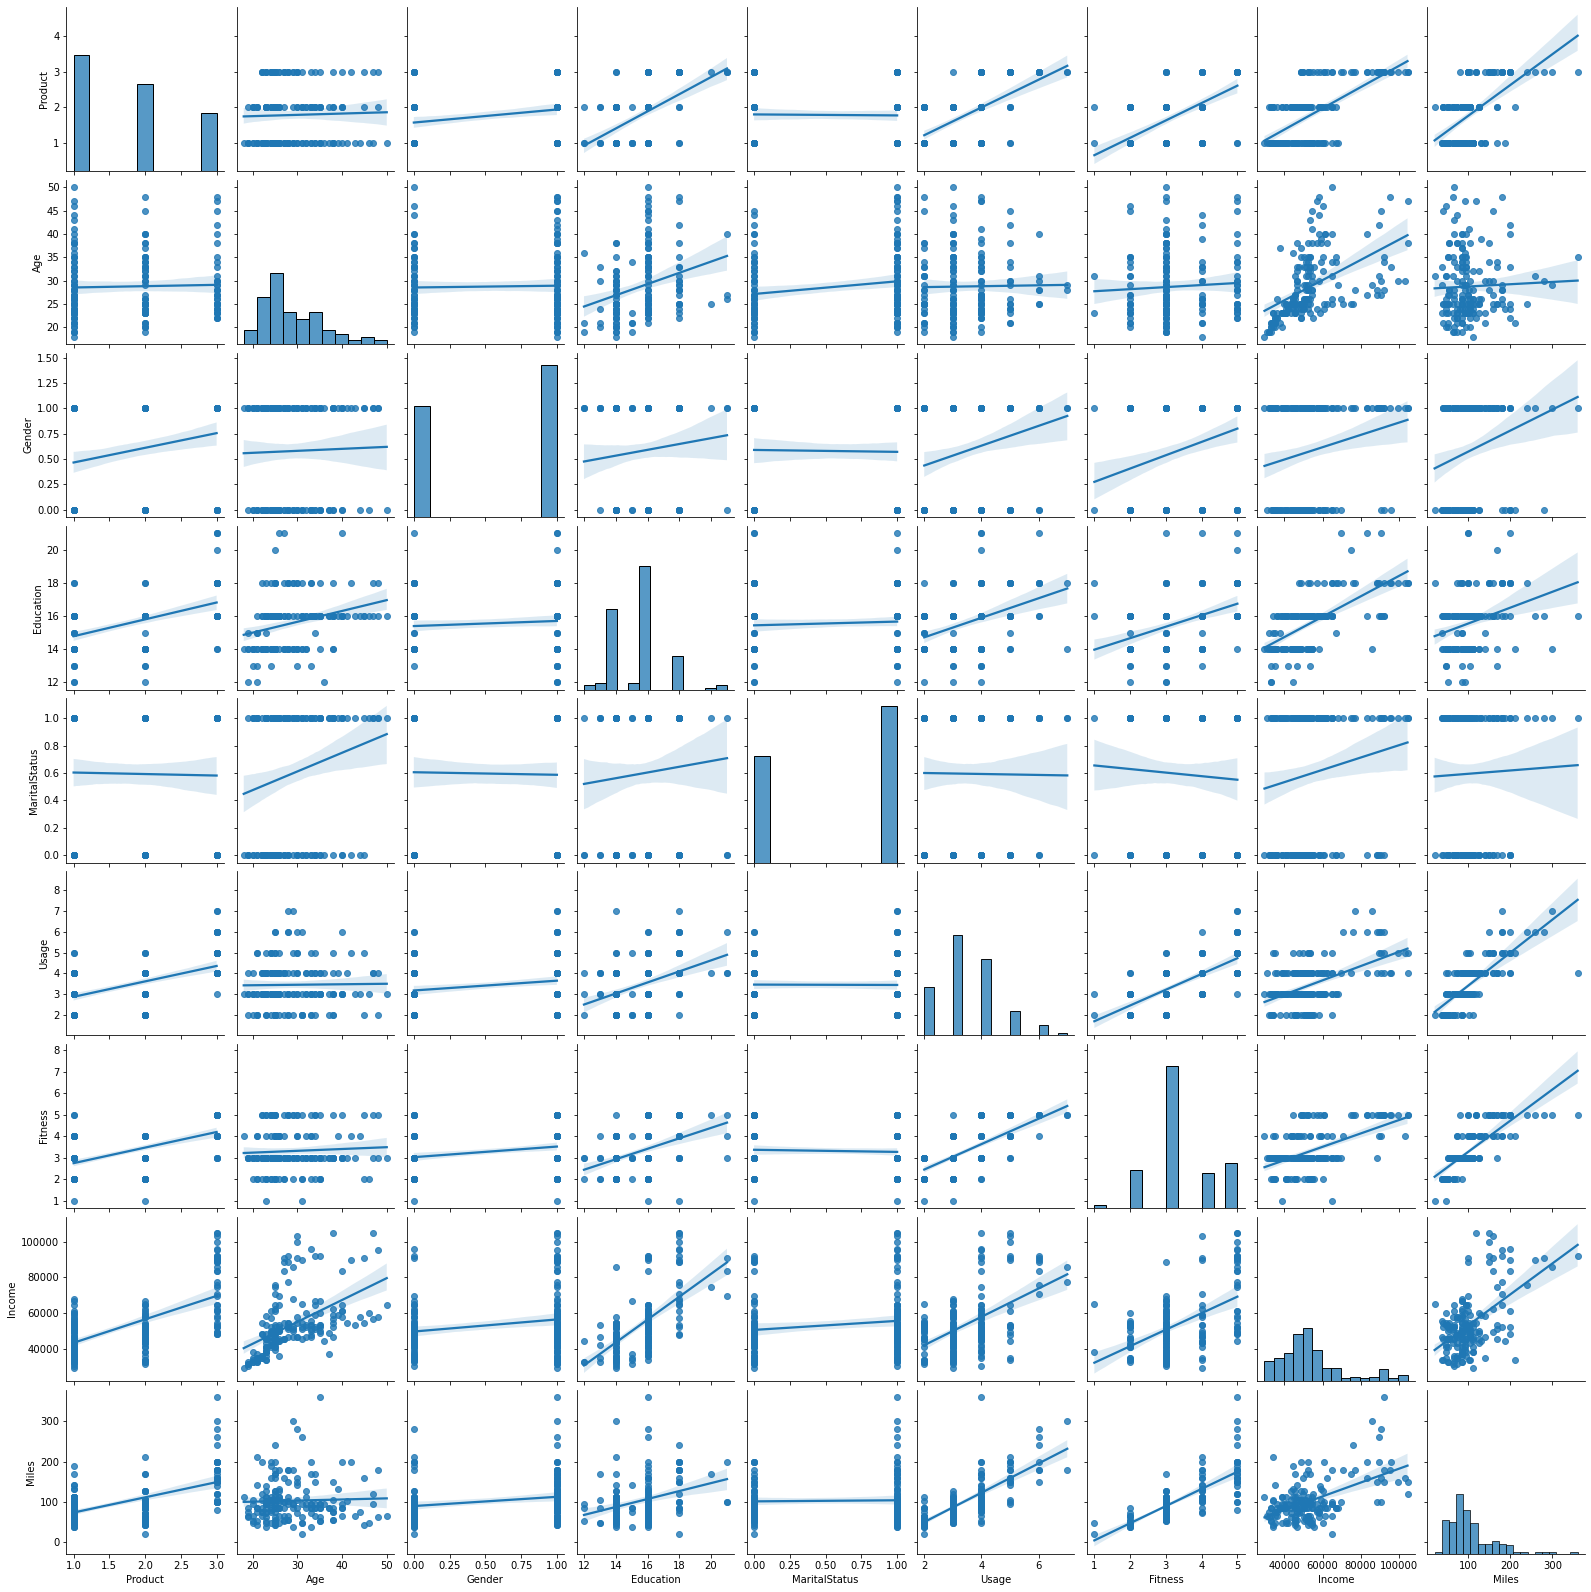

In [14]:
sb.pairplot(df,kind='reg')

Now this is fairly nice pairplot, but we still need to plot the Product. For this, we will transform this variable. We will do the same for Marital Status and Sex

In [10]:
product_map = {'TM195':1, 'TM498':2, 'TM798':3}
df['Product'] = df['Product'].map(product_map)

ms_map = {'Partnered':1,'Single':0}
df['MaritalStatus'] = df['MaritalStatus'].map(ms_map)

sex_map = {'Male':1,'Female':0}
df['Gender'] = df['Gender'].map(sex_map)

In [11]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,1,18,1,14,0,3,4,29562,112
1,1,19,1,15,0,2,3,31836,75
2,1,19,0,14,1,4,3,30699,66
3,1,19,1,12,0,3,3,32973,85
4,1,20,1,13,1,4,2,35247,47


Text(0.5, 1.0, 'Strong Correlation > 0.75')

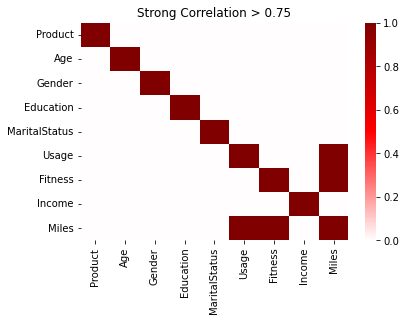

In [16]:
sb.heatmap(df.corr(method='spearman')>0.75,cmap='seismic',center=0)
plt.title('Strong Correlation > 0.75')

Text(0.5, 1.0, 'Some Correlation > 0.5')

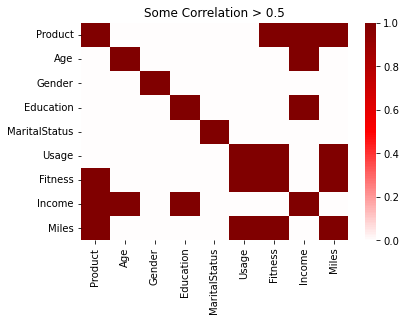

In [18]:
sb.heatmap(df.corr(method='spearman')>0.5,cmap='seismic',center=0)
plt.title('Some Correlation > 0.5')

## Based on the correlation graphs and the pairplot above, we can say the following:
- Miles has a strong positive correlation with Usage and Fitness, meaning that Miles feature increases as Fitness and Usage increases. Practically, it suggest that if a user is self evaluated with a higher Fitness value, the user estimated Usage and Miles are higher.
- Product type has some correlation that is worh inspecting with the Fitness, Income and Miles. It also has a strong coreelation with education, but that comes hand in hand with Income.
